#4.1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('RELIANCE.csv')

ashoka_mean_14=df[['Average Price']].rolling(14,min_periods=1).mean()
ashoka_std_14=df[['Average Price']].rolling(14,min_periods=1).std()

df['upper'] = ashoka_mean_14 + 2*ashoka_std_14
df['lower'] = ashoka_mean_14 - 2*ashoka_std_14
df['middle']=ashoka_mean_14
df=df[1:]

print(df)

       Symbol Series         Date  ...        upper        lower       middle
1    RELIANCE     EQ  16-May-2017  ...  1375.555676  1329.254324  1352.405000
2    RELIANCE     EQ  17-May-2017  ...  1369.484957  1336.495043  1352.990000
3    RELIANCE     EQ  18-May-2017  ...  1370.348582  1327.206418  1348.777500
4    RELIANCE     EQ  19-May-2017  ...  1373.801570  1313.038430  1343.420000
5    RELIANCE     EQ  22-May-2017  ...  1371.945054  1308.028280  1339.986667
..        ...    ...          ...  ...          ...          ...          ...
490  RELIANCE     EQ  07-May-2019  ...  1418.473270  1330.365301  1374.419286
491  RELIANCE     EQ  08-May-2019  ...  1425.230066  1318.897077  1372.063571
492  RELIANCE     EQ  09-May-2019  ...  1443.616333  1289.622238  1366.619286
493  RELIANCE     EQ  10-May-2019  ...  1455.046829  1265.886028  1360.466429
494  RELIANCE     EQ  13-May-2019  ...  1462.407460  1239.589683  1350.998571

[494 rows x 18 columns]


In [2]:
def call(row):
    if row['Close Price'] <= row['lower']: return 'Buy'
    if row['Close Price'] >= row['upper']: return 'Short'
    if row['Close Price'] <  row['middle']:   return 'Hold Buy/Liquidate Short'
    if row['Close Price'] >  row['middle']:   return 'Hold Short/Liquidate Buy'

df['Call'] = df.apply(call, axis=1)
print(df.head())

     Symbol Series  ...       middle                      Call
1  RELIANCE     EQ  ...  1352.405000  Hold Short/Liquidate Buy
2  RELIANCE     EQ  ...  1352.990000  Hold Short/Liquidate Buy
3  RELIANCE     EQ  ...  1348.777500  Hold Buy/Liquidate Short
4  RELIANCE     EQ  ...  1343.420000  Hold Buy/Liquidate Short
5  RELIANCE     EQ  ...  1339.986667  Hold Buy/Liquidate Short

[5 rows x 19 columns]


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

n = len(df)
dft = df[:int(n*0.8)]
dfte = df[int(n*0.8):]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1,max_iter=600)
clf.fit(dft[['Close Price','lower','upper','middle']], dft['Call'])

accuracy_score(dfte['Call'], clf.predict(dfte[['Close Price','lower','upper','middle']]))


0.3838383838383838

In [4]:
df2 = pd.read_csv("TCS.csv")

bajaj_mean_14=df2[['Average Price']].rolling(14,min_periods=1).mean()
bajaj_std_14=df2[['Average Price']].rolling(14,min_periods=1).std()

df2['upper'] = bajaj_mean_14 + 2*bajaj_std_14
df2['lower'] = bajaj_mean_14 - 2*bajaj_std_14
df2['middle'] = bajaj_mean_14
df2 = df2[1:]

df2['call'] = df2.apply(call, axis=1)

accuracy_score(df2['call'], clf.predict(df2[['Close Price','lower','upper','middle']]))

0.3440643863179074

##4.2

In [5]:
import pandas as pd

df=pd.read_csv('RELIANCE.csv')
print(df.head())

     Symbol Series  ... Deliverable Qty  % Dly Qt to Traded Qty
0  RELIANCE     EQ  ...          802733                   52.12
1  RELIANCE     EQ  ...         1238129                   42.80
2  RELIANCE     EQ  ...         1225837                   54.47
3  RELIANCE     EQ  ...         1339478                   59.85
4  RELIANCE     EQ  ...         1444387                   49.32

[5 rows x 15 columns]


In [6]:
df['oc'] = 100*(df['Close Price']-df['Open Price'])/df['Open Price']
df['lh'] = 100*(df['High Price']-df['Low Price'])/df['Low Price']
df['mean5']=df[['Close Price']].rolling(5,min_periods=1).mean()
df['std5']=df[['Close Price']].rolling(5,min_periods=1).std()
df=df[1:]
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,oc,lh,mean5,std5
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.761487,2.677107,1350.200000,8.626703
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,0.007391,1.350399,1351.166667,6.325609
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-0.962507,1.956046,1345.212500,12.980137
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-1.061515,1.961832,1339.940000,16.289851
5,RELIANCE,EQ,22-May-2017,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87,-0.177158,1.399027,1335.950000,17.420211


In [7]:
def action(row):
    if row['Close Price'] <= row['Prev Close']: 
      return 1
    else: 
      return -1

df['action'] = df.apply(action, axis=1)


In [8]:
from sklearn.ensemble import RandomForestClassifier
n = len(df)

dft = df[:int(n*0.8)]
dfte = df[int(n*0.8):]

clf = RandomForestClassifier(random_state=0)
clf.fit(dft[['oc','lh','mean5','std5']], dft['action'])

accuracy_score(dfte['action'], clf.predict(dfte[['oc','lh','mean5','std5']]))

0.8787878787878788

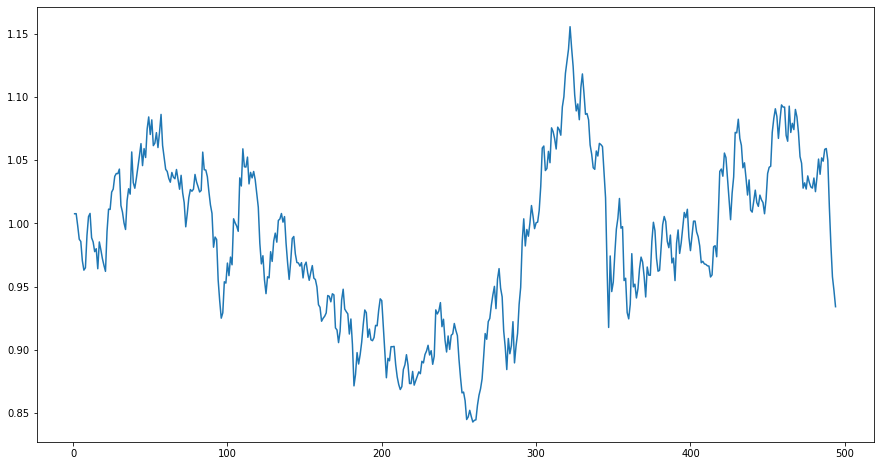

In [9]:
plt.figure(figsize=(15,8))
plt.plot(1+(df['oc']/100).cumsum())